In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

sns.set(style='dark', color_codes=True, font_scale=1.3)

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
df_inmates = pd.read_csv('exinmates.csv', encoding="latin-1")
df_inmates = df_inmates.set_index("Execution No.")
df_inmates

,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,Gender,...,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate,YOB,ex year
Execution No.,,,,,,,,,,,,,,,,,,,,,
545,999275,Ruben,Cardenas,7/29/1998,28.0,2/22/1997,26.0,11/9/2017,47,Male,...,Brown,Black,Mexico,This is my statement:ÌâåÊ My final words.ÌâåÊ ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4,1970,11/9/2017
544,999411,Robert,Pruett,4/30/2002,22.0,12/17/1999,20.0,10/12/2017,38,Male,...,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6,1979,10/12/2017
543,999494,Taichin,Preyor,3/30/2005,34.0,2/26/2004,33.0,7/27/2017,46,Male,...,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6,1971,7/27/2017
542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/2017,61,NaN,...,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3,1956,3/14/2017
541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/7/2017,44,NaN,...,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4,1973,3/7/2017
540,999463,Terry,Edwards,12/4/2003,30.0,7/8/2002,28.0,1/26/2017,43,Male,...,Brown,Black,Texas,"Yes, I made peace with God. I hope y'all make ...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,13.8,1974,1/26/2017
539,999533,Christopher,Wilkins,3/12/2008,39.0,10/28/2005,37.0,1/11/2017,48,Male,...,Green,Brown,Texas,None,0,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,10.0,1969,1/11/2017
538,999481,Barney,Fuller,7/21/2004,45.0,5/14/2003,44.0,10/5/2016,58,Male,...,Brown,Brown,Ohio,"I don't have anything to say, you can proceed ...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,27.2,1958,10/5/2016
537,999297,Pablo,Vasquez,3/30/1999,21.0,4/18/1998,20.0,4/6/2016,38,Male,...,Brown,Black,Texas,"I just want to tell my family thank you, my mo...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4,1978,4/6/2016


In [4]:
pov_rates = pd.read_csv('pov_rates.csv')
county_codes = pd.read_csv('county_codes.csv')

In [5]:
county_codes.head()

,County,FIPS #
0,Anderson,1
1,Andrews,3
2,Angelina,5
3,Aransas,7
4,Archer,9


In [6]:
pov_rates.head()

,FIPS #,Year,Rate
0,1,1989,20.5
1,1,1993,20.8
2,1,1995,20.1
3,1,1996,NaN
4,1,1997,20.4


# For missing DOB values, subtract execution age from execution date
# .
# .
# For graph, use 23 yr average for all counties, but highlight counties we have inmate data for
# .
# TODO:
# .
# Pull new pov_rates based on YOB column
# .
# Add num of inmates to hover on bokeh plot

In [7]:
pov_by_county = pd.merge(pov_rates, county_codes, on='FIPS #')
pov_by_county = pov_by_county.drop("FIPS #", axis=1).set_index("County")

# No data for 1996
pov_by_county = pov_by_county[pov_by_county.Year != 1996]

pov_by_county.head()

,Year,Rate
County,,
Anderson,1989,20.5
Anderson,1993,20.8
Anderson,1995,20.1
Anderson,1997,20.4
Anderson,1998,18.6


In [8]:
povs = df_inmates.copy()

In [9]:
# Setting poverty rate based on the inmate's county and year of birth
for inmate in povs.iterrows():  
    povs.ix[inmate[0]]['Poverty Rate'] = pov_by_county[(pov_by_county.index==povs.ix[inmate[0]]['County']) 
                                                       & (pov_by_county["Year"]==povs.ix[inmate[0]]['YOB'])]

df_inmates = povs.copy()
df_inmates.head()

C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\Jess\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,TDCJ Number,First Name,Last Name,Date Received,Age Received,Date of Offense,Age at Offense,Execution Date,Execution Age,Gender,...,Eye Color,Hair Color,Native State,Last Statement,Sentiment,More Info URL,Last Statement URL,Poverty Rate,YOB,ex year
Execution No.,,,,,,,,,,,,,,,,,,,,,
545,999275,Ruben,Cardenas,7/29/1998,28.0,2/22/1997,26.0,11/9/2017,47,Male,...,Brown,Black,Mexico,This is my statement:ÌâåÊ My final words.ÌâåÊ ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,45.4,1970,11/9/2017
544,999411,Robert,Pruett,4/30/2002,22.0,12/17/1999,20.0,10/12/2017,38,Male,...,Brown,Blonde,Texas,I just want to let everyone in here to know I ...,-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,26.6,1979,10/12/2017
543,999494,Taichin,Preyor,3/30/2005,34.0,2/26/2004,33.0,7/27/2017,46,Male,...,Brown,Black,Texas,"First and foremost I'd like to say, ""Justice h...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,21.6,1971,7/27/2017
542,997,James,Bigby,NaN,NaN,NaN,NaN,3/14/2017,61,NaN,...,NaN,NaN,NaN,"Yes, I do, Grace Kehler is that you? I have gi...",-1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,12.3,1956,3/14/2017
541,999145,Rolando,Ruiz,NaN,NaN,NaN,NaN,3/7/2017,44,NaN,...,NaN,NaN,NaN,"Yes sir, I would first like to say to the Sanc...",1,https://www.tdcj.state.tx.us/death_row/dr_info...,https://www.tdcj.state.tx.us/death_row/dr_info...,19.4,1973,3/7/2017


In [10]:
df_inmates['Age Received'].mean()

28.564935064935064

In [11]:
df_inmates['Age at Offense'].mean()

26.954545454545453

Most inmates on average enter death row approximately 2.5 years after their offense (quick turn around time).

In [12]:
df_inmates['Execution Age'].mean()

39.3394495412844

Most inmates on average stay on death row for approximately 11 years before being executed.

In [13]:
df_inmates['Gender'].value_counts()

Male      150
Female      3
male        1
Name: Gender, dtype: int64

Clearly, males outnumber females.

In [14]:
df_inmates['Race'].value_counts()

White       242
Black       198
Hispanic    103
Other         2
Name: Race, dtype: int64

A majority of inmates being White, with a close 2nd of Black.

In [15]:
df_inmates['Education Level'].max()

12.0

In [16]:
df_inmates['Education Level'].min()

3.0

In [17]:
df_inmates['Education Level'].mean()

9.876623376623376

The lowest being 3rd grade and the highest finishing high school, inmates average an education level of 9th grade.

In [18]:
df_inmates['Sentiment'].value_counts()

 1    200
 0    192
-1    153
Name: Sentiment, dtype: int64

A very close distribution between positive, negative, and neutral sentiments.  However, inmates are more positive at the time of their death.

In [19]:
df_inmates['Poverty Rate'].mean()

17.570458715596356

The average poverty rate for each executed prisoner during their year of birth (or closest available year) is 17.57%

In [20]:
pov_by_county.groupby("Year").describe()

Rate                                                       
      count       mean       std  min     25%    50%     75%   max
Year                                                              
1989  253.0  19.985771  8.634788  5.6  14.200  18.70  24.500  55.2
1993  254.0  20.132283  7.230473  4.3  15.925  19.40  23.100  49.9
1995  254.0  20.188583  7.788183  3.5  15.425  19.20  23.875  52.0
1997  254.0  19.279134  7.001682  4.7  14.700  18.40  23.000  46.7
1998  254.0  18.381102  6.583339  4.0  14.325  17.40  21.450  43.8
1999  254.0  17.548819  6.171128  4.4  13.925  16.70  20.050  44.9
2000  254.0  17.763780  6.139687  4.3  13.925  17.00  20.500  42.2
2001  254.0  17.674803  5.942591  4.7  13.625  16.90  20.600  40.4
2002  254.0  17.300000  5.667828  4.8  13.650  16.50  20.100  39.0
2003  254.0  16.821654  4.915978  5.4  13.800  16.40  19.175  36.4
2004  254.0  16.483858  4.975594  5.5  13.250  16.10  19.000  34.8
2005  254.0  18.510630  6.422915  5.0  14.500  18.10  21.175  45.7
2006  254.0  18.311417  6.285669  4.9  14.400  17.50  21.200  44.4
2007  254.0  17.403543  6.025016  5.0  13.625  16.50  20.100  40.7
2008  254.0  17.040945  5.724275  6.2  13.400  15.95  20.500  36.8
2009  254.0  17.983465  6.016273  5.5  14.125  17.20  20.700  41.6
2010  254.0  18.540157  6.020857  6.4  14.500  18.20  21.300  39.9
2011  254.0  18.704331  6.017374  6.0  14.625  17.90  21.775  39.3
2012  254.0  18.324803  5.915182  6.7  14.300  17.80  21.275  43.6
2013  254.0  18.149606  5.651617  6.6  14.225  17.90  21.600  43.1
2014  254.0  17.455512  5.480265  6.8  13.825  17.20  20.375  38.8
2015  254.0  16.818504  5.327074  6.0  13.200  16.50  19.975  35.4

Average poverty rates for all Texas counties for every available year.

In [21]:
avg_pov_rates = pov_by_county.groupby("County").describe()['Rate']['mean']

In [22]:
counties = df_inmates[['County', 'Poverty Rate']]

counties = counties.set_index("County")
counties['Inmates'] = df_inmates['County'].value_counts()
counties = counties.reset_index()

counties.head()

,County,Poverty Rate,Inmates
0,Hidalgo,45.4,6
1,Bee,26.6,2
2,Bexar,21.6,44
3,Tarrant,12.3,40
4,Bexar,19.4,44


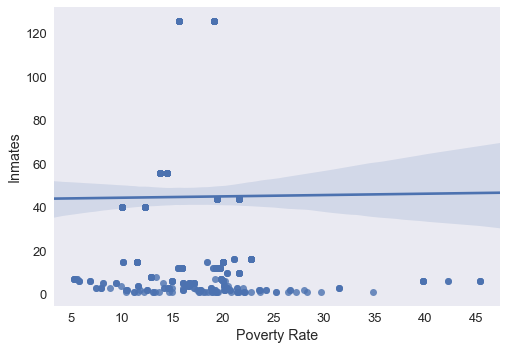

In [23]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties)

In [24]:
np.corrcoef(x=counties["Poverty Rate"], y=counties["Inmates"])

array([[ 1.        ,  0.00732972],
       [ 0.00732972,  1.        ]])

In [25]:
counties_3 = counties[counties.Inmates > 2]

In [26]:
np.corrcoef(x=counties_3["Poverty Rate"], y=counties_3["Inmates"])

array([[ 1.        ,  0.04892873],
       [ 0.04892873,  1.        ]])

In [27]:
counties_10 = counties[counties.Inmates > 9]
np.corrcoef(x=counties_10["Poverty Rate"], y=counties_10["Inmates"])


array([[ 1.        ,  0.15838181],
       [ 0.15838181,  1.        ]])

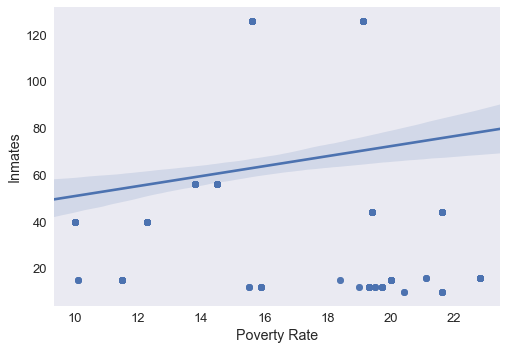

In [28]:
sns.regplot(x="Poverty Rate", y="Inmates", data=counties_10)

In [29]:
x = counties_10['Poverty Rate']
y = counties_10['Inmates']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [30]:
print (slope, intercept, r_value, p_value, std_err)

2.1365622722 29.6298051643 0.158381810314 0.00265375859605 0.70594143739


In [53]:
counties = counties.set_index("County")
counties.head()

,Poverty Rate,Inmates
County,,
Hidalgo,45.4,6
Bee,26.6,2
Bexar,21.6,44
Tarrant,12.3,40
Bexar,19.4,44


In [32]:
avg_inmate_pov_rate = counties.groupby("County").describe()['Poverty Rate']['mean']

In [54]:
import bokeh.sampledata
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as tx_counties

palette.reverse()

tx_counties = {
    code: county for code, county in tx_counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in tx_counties.values()]
county_ys = [county["lats"] for county in tx_counties.values()]

inmate_county_xs = [county["lons"] for county in tx_counties.values() if county['name'] in counties.index]
inmate_county_ys = [county["lats"] for county in tx_counties.values() if county['name'] in counties.index]

county_names = [county['name'] for county in tx_counties.values()]
county_rates = [avg_pov_rates[name] for name in county_names]

inmate_county_names = [county['name'] for county in tx_counties.values() if county['name'] in counties.index]
inmate_county_rates = [avg_inmate_pov_rate[name] for name in county_names if name in counties.index]

In [66]:
color_mapper = LogColorMapper(palette=palette)

other_source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

inmate_source = ColumnDataSource(data=dict(
    x=inmate_county_xs,
    y=inmate_county_ys,
    name=inmate_county_names,
    rate=inmate_county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Executed Inmates", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=other_source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.1)

p.patches('x', 'y', source=inmate_source,
         fill_color={'field': 'rate', 'transform': color_mapper},
         fill_alpha=0.7, line_color="white", line_width=1.1)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Poverty rate)", "@rate%")
]

show(p)

AttributeError: unexpected attribute 'legend' to Figure, possible attributes are above, background_fill_alpha, background_fill_color, below, border_fill_alpha, border_fill_color, css_classes, disabled, extra_x_ranges, extra_y_ranges, h_symmetry, height, hidpi, inner_height, inner_width, js_event_callbacks, js_property_callbacks, layout_height, layout_width, left, lod_factor, lod_interval, lod_threshold, lod_timeout, min_border, min_border_bottom, min_border_left, min_border_right, min_border_top, name, outline_line_alpha, outline_line_cap, outline_line_color, outline_line_dash, outline_line_dash_offset, outline_line_join, outline_line_width, plot_height, plot_width, renderers, right, sizing_mode, subscribed_events, tags, title, title_location, tool_events, toolbar, toolbar_location, toolbar_sticky, v_symmetry, webgl, width, x_mapper_type, x_range, y_mapper_type or y_range